In [123]:
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
!ls /data/so-survey

README_2021.txt     survey_results_public.csv
so_survey_2021.pdf  survey_results_schema.csv


In [125]:
schema = pd.read_csv("/data/so-survey/survey_results_schema.csv")
data = pd.read_csv("/data/so-survey/survey_results_public.csv")

In [126]:
data.iloc[0]

ResponseId                                                                      1
MainBranch                                         I am a developer by profession
Employment                      Independent contractor, freelancer, or self-em...
Country                                                                  Slovakia
US_State                                                                      NaN
UK_Country                                                                    NaN
EdLevel                         Secondary school (e.g. American high school, G...
Age1stCode                                                          18 - 24 years
LearnCode                       Coding Bootcamp;Other online resources (ex: vi...
YearsCode                                                                     NaN
YearsCodePro                                                                  NaN
DevType                                                         Developer, mobile
OrgSize         

In [127]:
schema

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID24,Employment,Which of the following best describes your cur...,False,MC,MAVR
5,QID6,Country,"Where do you live? <span style=""font-weight: b...",True,MC,DL
6,QID7,US_State,<p>In which state or territory of the USA do y...,False,MC,DL
7,QID9,UK_Country,In which part of the United Kingdom do you liv...,False,MC,DL
8,QID190,S2,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
9,QID25,EdLevel,Which of the following best describes the high...,False,MC,SAVR


In [128]:
dev_data = data[~data['YearsCodePro'].isna()]
dev_data = dev_data[~dev_data['YearsCodePro'].isin(['More than 50 years', 'Less than 1 year'])]
dev_data['YearsCodePro'] = dev_data['YearsCodePro'].astype(int)
dev_data = dev_data[dev_data['YearsCodePro'] > 1]

In [129]:
non_na_dev_data = dev_data[~dev_data['LanguageHaveWorkedWith'].isna()]

In [130]:
# Dropped because no 'LanguageHaveWorkedWith'
len(dev_data) - len(non_na_dev_data), len(dev_data), len(non_na_dev_data)

(275, 55420, 55145)

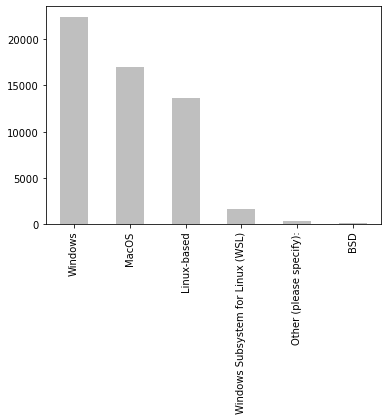

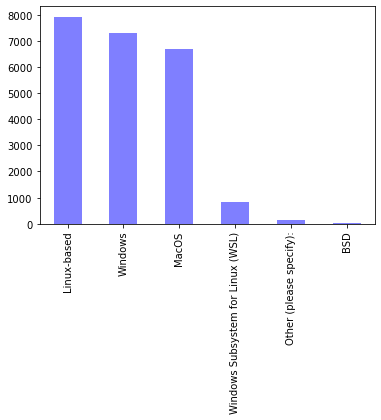

In [131]:
non_na_dev_data['OpSys'].value_counts().plot.bar(stacked=True, alpha = 0.5, color='grey')
plt.show()
non_na_dev_data[non_na_dev_data['LanguageHaveWorkedWith'].str.contains('Python')]['OpSys'].value_counts().plot.bar(alpha = 0.5, color='blue')

In [132]:
query = non_na_dev_data[non_na_dev_data['LanguageHaveWorkedWith'].str.contains('Python')]['OpSys']; query.value_counts()/(query.value_counts().sum()) * 100

Linux-based                          34.597922
Windows                              31.869379
MacOS                                29.158299
Windows Subsystem for Linux (WSL)     3.623505
Other (please specify):               0.624291
BSD                                   0.126604
Name: OpSys, dtype: float64

In [133]:
query = non_na_dev_data['OpSys']; query.value_counts()/(query.value_counts().sum()) * 100

Windows                              40.780521
MacOS                                30.905165
Linux-based                          24.810857
Windows Subsystem for Linux (WSL)     2.868443
Other (please specify):               0.506196
BSD                                   0.128817
Name: OpSys, dtype: float64